In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

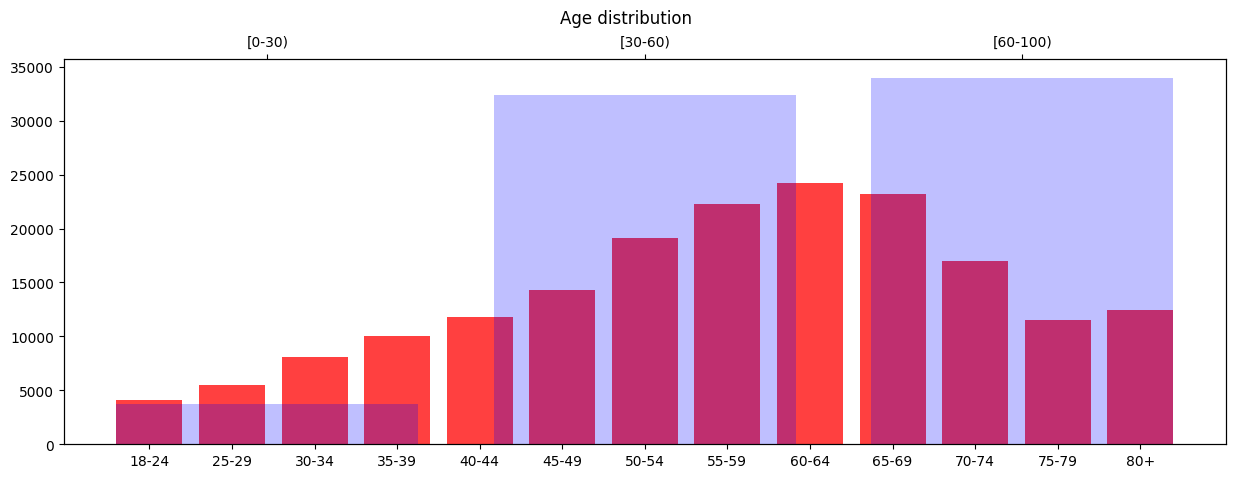

In [1]:
# Load the data
data = pd.read_csv('../diabetes_012/simulations/westin.csv')

# all ages
age_distr = data.groupby('Age').size()
# age groups
age_group_count = age_distr.loc[['[0-30)', '[30-60)', '[60-100)']]
# dataset ages
age_count = age_distr.drop(labels=['[0-30)', '[30-60)', '[60-100)'])

fig, ax = plt.subplots(figsize=(15, 5))
fig.suptitle('Age distribution')
secax = ax.twiny()
secax.bar(age_group_count.index, age_group_count.values, color='blue', alpha=0.25)
ax.bar(age_count.index, age_count.values, color='red', alpha=0.75)

plt.show()

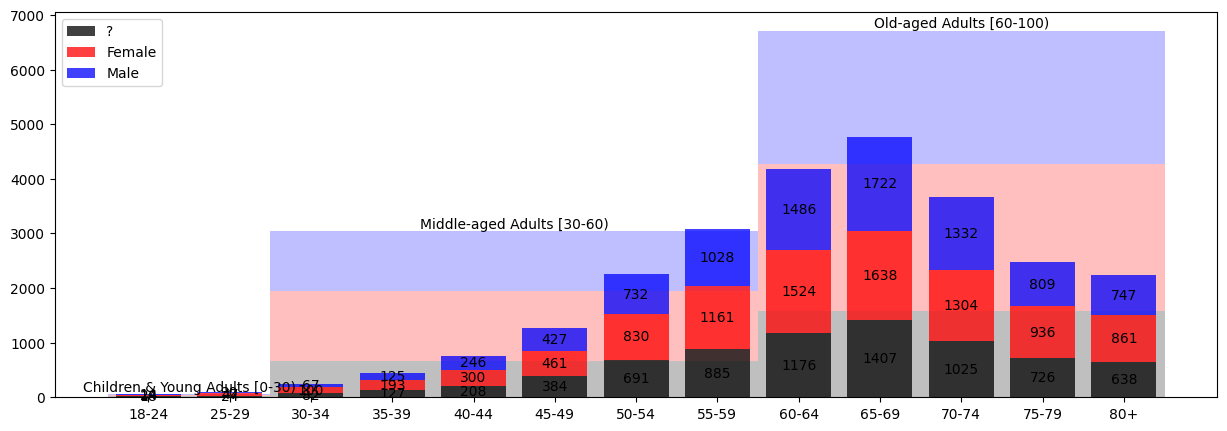

In [2]:
data = pd.read_csv('../diabetes_012/simulations/westin.csv')
labels = ['Children & Young Adults [0-30)', 'Middle-aged Adults [30-60)', 'Old-aged Adults [60-100)']

data_diabetes = data[data['Diabetes_012'] == 2.0]
fig, ax = plt.subplots(figsize=(15, 5))

# all ages
age_distr = data_diabetes.groupby(['Age','Sex'])['Diabetes_012'].count()
# age groups
age_group_count = age_distr.loc[['[0-30)', '[30-60)', '[60-100)']]
age_group_count_fixed = age_group_count.reorder_levels(['Sex', 'Age']).sort_index().reset_index()
sex_female = age_group_count_fixed.loc[age_group_count_fixed['Sex'] == 'female']
sex_male = age_group_count_fixed.loc[age_group_count_fixed['Sex'] == 'male']
sex_unknown = age_group_count_fixed.loc[age_group_count_fixed['Sex'] == '?']
y = age_group_count_fixed.loc[age_group_count_fixed['Sex'] != 'male'].groupby('Age').sum().reset_index()
groups = [0.5, 4.5, 10]
widths = [2, 6, 5]
ax.bar(groups, sex_unknown['Diabetes_012'], width=widths, align='center', color='black', alpha=0.25)
ax.bar(groups, sex_female['Diabetes_012'], width=widths, align='center',color='red',  alpha=0.25, bottom=sex_unknown['Diabetes_012'])
ax.bar(groups, sex_male['Diabetes_012'],width=widths,align='center', color='blue',  alpha=0.25, bottom=y['Diabetes_012'])

# dataset ages
age_count = age_distr.drop(labels=['[0-30)', '[30-60)', '[60-100)'])
age_count_fixed = age_count.reorder_levels(['Sex', 'Age']).sort_index().reset_index()
sex_unknown2 = age_count_fixed.loc[age_count_fixed['Sex'] == '?']
sex_female2 = age_count_fixed.loc[age_count_fixed['Sex'] == 'female']
sex_male2 = age_count_fixed.loc[age_count_fixed['Sex'] == 'male']
y2 = age_count_fixed.loc[age_count_fixed['Sex'] != 'male'].groupby('Age').sum().reset_index()
ax.bar(sex_unknown2['Age'], sex_unknown2['Diabetes_012'], color='black', label='?', alpha=0.75)
ax.bar(sex_female2['Age'], sex_female2['Diabetes_012'], color='red', label='Female', alpha=0.75, bottom=sex_unknown2['Diabetes_012'])
ax.bar(sex_male2['Age'], sex_male2['Diabetes_012'], color='blue', label='Male', alpha=0.75, bottom=y2['Diabetes_012'])
plt.legend()
ax.bar_label(ax.containers[2], label_type='edge',labels=labels)
ax.bar_label(ax.containers[3], label_type='center')
ax.bar_label(ax.containers[4], label_type='center')
ax.bar_label(ax.containers[5], label_type='center')
plt.show()

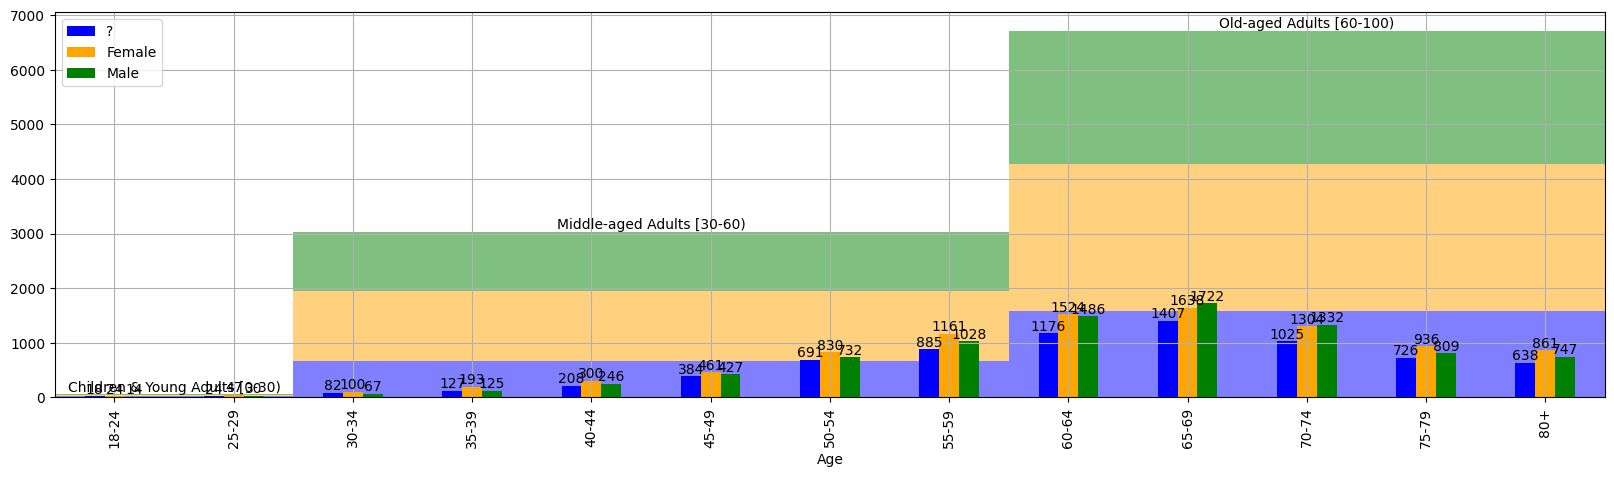

In [3]:
data = pd.read_csv('../diabetes_012/simulations/westin.csv')
labels = ['Children & Young Adults [0-30)', 'Middle-aged Adults [30-60)', 'Old-aged Adults [60-100)']

data_diabetes = data[data['Diabetes_012'] == 2.0]
fig, ax = plt.subplots(figsize=(20, 5))

# all ages
age_distr = data_diabetes.groupby(['Age','Sex'], dropna=False)['Diabetes_012'].count()
age_distr = age_distr.fillna(0)
# print(age_distr)
# age groups
age_group_count = age_distr.loc[['[0-30)', '[30-60)', '[60-100)']]
age_group_count_fixed = age_group_count.reorder_levels(['Sex', 'Age']).sort_index().reset_index()
sex_female = age_group_count_fixed.loc[age_group_count_fixed['Sex'] == 'female']
# print(sex_female)
sex_male = age_group_count_fixed.loc[age_group_count_fixed['Sex'] == 'male']
# print(sex_male)
sex_unknown = age_group_count_fixed.loc[age_group_count_fixed['Sex'] == '?']
# print(sex_unknown)
y = age_group_count_fixed.loc[age_group_count_fixed['Sex'] != 'male'].groupby('Age', dropna=False).sum().reset_index()
groups = [0.5, 4.5, 10]
widths = [2, 6, 5]
colors = ['blue', 'orange', 'green']
ax.bar(groups, sex_unknown['Diabetes_012'], width=widths, align='center', color=colors[0], alpha=0.5) # not in simulation light
ax.bar(groups, sex_female['Diabetes_012'], width=widths, align='center',color=colors[1],  alpha=0.5, bottom=sex_unknown['Diabetes_012'])
ax.bar(groups, sex_male['Diabetes_012'],width=widths,align='center', color=colors[2],  alpha=0.5, bottom=y['Diabetes_012'])

# dataset ages
age_count = age_distr.drop(labels=['[0-30)', '[30-60)', '[60-100)'])
age_count_fixed = age_count.reorder_levels(['Sex', 'Age']).sort_index().reset_index()
sex_unknown2 = age_count_fixed.loc[age_count_fixed['Sex'] == '?']
sex_female2 = age_count_fixed.loc[age_count_fixed['Sex'] == 'female']
sex_male2 = age_count_fixed.loc[age_count_fixed['Sex'] == 'male']
combined = pd.DataFrame(
    columns=['Age', '?', 'Female', 'Male'],
)
for index, row in sex_unknown2.iterrows():
    combined.loc[len(combined.index)] = [row['Age'],row['Diabetes_012'],sex_female2.iloc[index, 2],sex_male2.iloc[index, 2]]
(combined.set_index('Age')).plot.bar(grid =True, ax=ax, color=colors)

plt.legend()
ax.bar_label(ax.containers[2], label_type='edge',labels=labels)
ax.bar_label(ax.containers[3], label_type='edge')
ax.bar_label(ax.containers[4], label_type='edge')
ax.bar_label(ax.containers[5], label_type='edge')
plt.show()

/var/folders/69/knkk0bvs2zj17g66y54b741c0000gn/T/ipykernel_69918/3026697667.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=14)
/var/folders/69/knkk0bvs2zj17g66y54b741c0000gn/T/ipykernel_69918/3026697667.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=14)
/var/folders/69/knkk0bvs2zj17g66y54b741c0000gn/T/ipykernel_69918/3026697667.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=14)
/var/folders/69/knkk0bvs2zj17g66y54b741c0000gn/T/ipykernel_69918/3026697667.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a

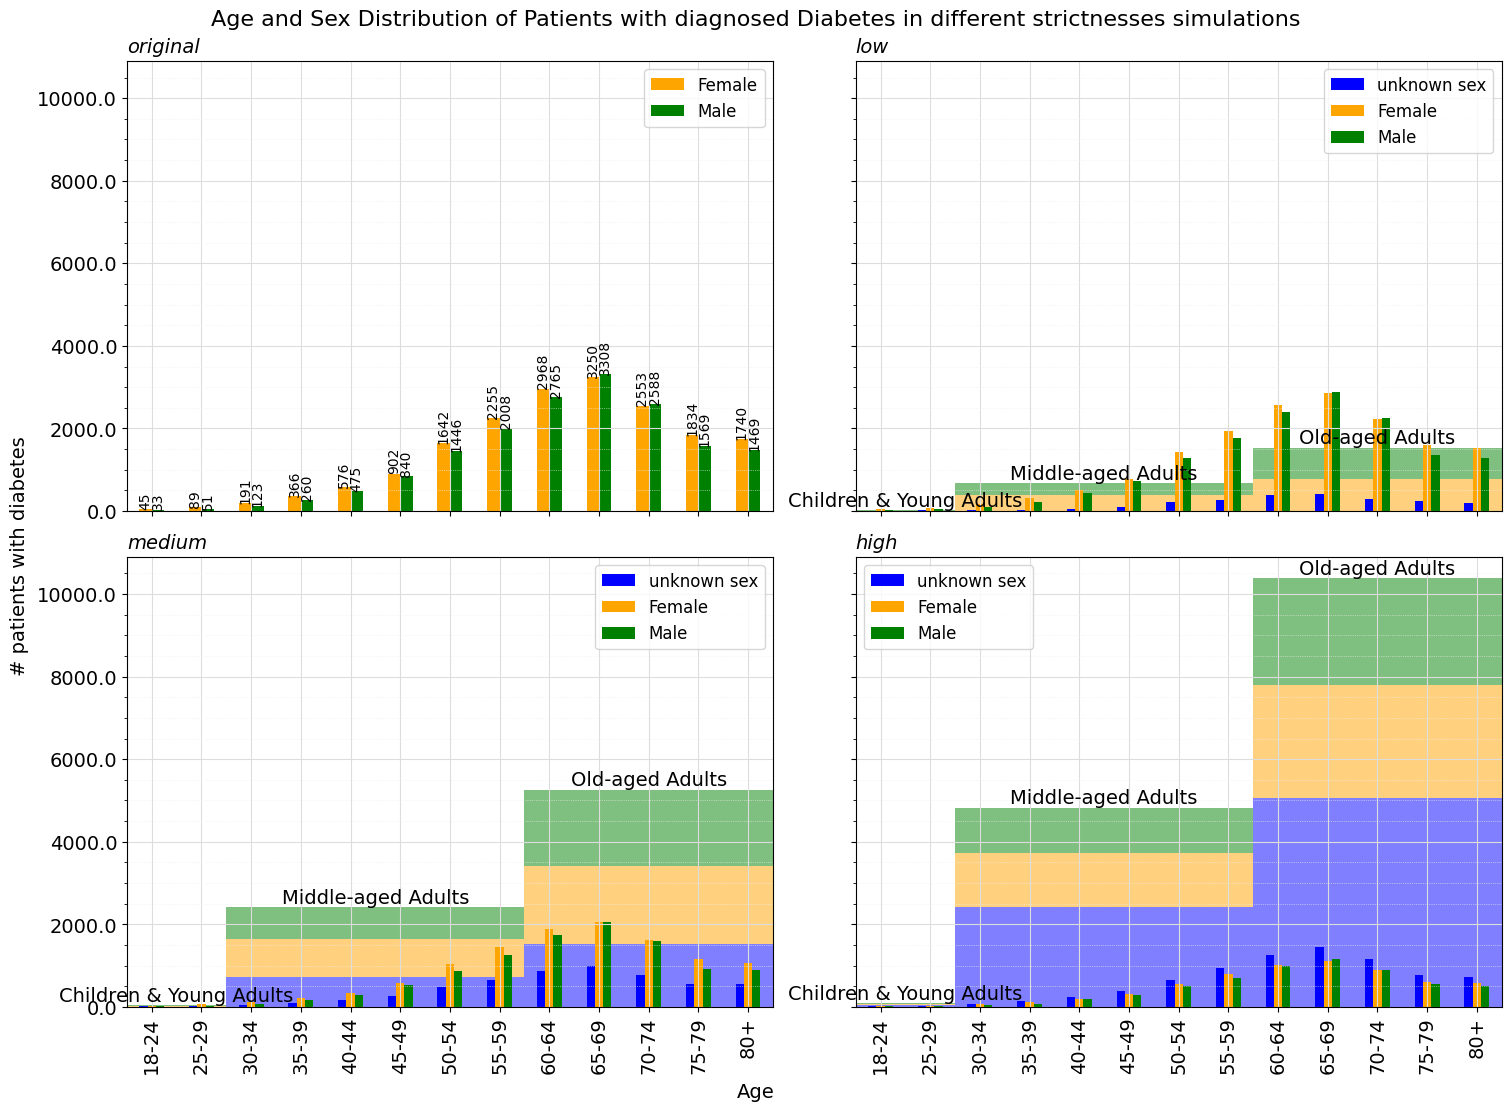

In [3]:
fig = plt.figure(figsize=(15, 11), layout='constrained')
ax_array = fig.subplots(2, 2, squeeze=False, sharey=True, sharex=True)
def mulitplot(ax, level):
    # Load the data
    if level == 'original':
        data = pd.read_csv('../diabetes_012/diabetes_012_cleaned.csv')
    else:
        data = pd.read_csv('../diabetes_012/simulations/'+level+'.csv')
    labels = ['Children & Young Adults', 'Middle-aged Adults', 'Old-aged Adults']

    data_diabetes = data[data['Diabetes_012'] == 2.0]

    # all ages
    age_distr = data_diabetes.groupby(['Age','Sex'], dropna=False)['Diabetes_012'].count()
    age_distr = age_distr.fillna(0)
    # print(age_distr)
    # age groups
    if level != 'original':
        age_group_count = age_distr.loc[['[0-30)', '[30-60)', '[60-100)']]
        age_group_count_fixed = age_group_count.reorder_levels(['Sex', 'Age']).sort_index().reset_index()
        sex_female = age_group_count_fixed.loc[age_group_count_fixed['Sex'] == 'female']
        sex_male = age_group_count_fixed.loc[age_group_count_fixed['Sex'] == 'male']
        sex_unknown = age_group_count_fixed.loc[age_group_count_fixed['Sex'] == '?']
        y = age_group_count_fixed.loc[age_group_count_fixed['Sex'] != 'male'].groupby('Age', dropna=False).sum().reset_index()
        groups = [0.5, 4.5, 10]
        widths = [2, 6, 5]
        colors = ['blue', 'orange', 'green']
        if level == 'low':
            ax.bar(groups, sex_female['Diabetes_012'], width=widths, align='center',color=colors[1],  alpha=0.5 )#, bottom=sex_unknown['Diabetes_012'])
            ax.bar(groups, sex_male['Diabetes_012'],width=widths,align='center', color=colors[2],  alpha=0.5, bottom=sex_female['Diabetes_012'])
        else:
            ax.bar(groups, sex_unknown['Diabetes_012'], width=widths, align='center', color=colors[0], alpha=0.5) # not in simulation low
            ax.bar(groups, sex_female['Diabetes_012'], width=widths, align='center',color=colors[1],  alpha=0.5, bottom=sex_unknown['Diabetes_012'])
            ax.bar(groups, sex_male['Diabetes_012'],width=widths,align='center', color=colors[2],  alpha=0.5, bottom=y['Diabetes_012'])
    # dataset ages
    if level != 'original':
        age_count = age_distr.drop(labels=['[0-30)', '[30-60)', '[60-100)'])
    else:
        age_count = age_distr
        colors = ['orange', 'green']
    age_count_fixed = age_count.reorder_levels(['Sex', 'Age']).sort_index().reset_index()
    sex_unknown2 = age_count_fixed.loc[age_count_fixed['Sex'] == '?']
    sex_female2 = age_count_fixed.loc[age_count_fixed['Sex'] == 'female']
    sex_male2 = age_count_fixed.loc[age_count_fixed['Sex'] == 'male']
    combined = pd.DataFrame(
        columns=['Age', 'unknown sex', 'Female', 'Male'],
    )
    if level == 'original':
        combined.drop(columns=['unknown sex'], inplace=True)
        for index, row in sex_female2.iterrows():
            combined.loc[len(combined.index)] = [row['Age'], row['Diabetes_012'], sex_male2.iloc[index, 2]]
    else:    
        for index, row in sex_unknown2.iterrows():
            combined.loc[len(combined.index)] = [row['Age'],row['Diabetes_012'],sex_female2.iloc[index, 2],sex_male2.iloc[index, 2]]
    # print(combined)
    (combined.set_index('Age')).plot.bar(grid =True, ax=ax, color=colors)
    ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
    ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
    ax.set_title(level, loc='left', fontstyle='oblique', fontsize=14)
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.set_xlabel('')
    ax.legend(fontsize=12)
    ax.set_xticklabels(combined['Age'], rotation=90, fontsize=14)
    ax.set_yticklabels(ax.get_yticks(), fontsize=14)
    if level == 'low':
        ax.bar_label(ax.containers[1], label_type='edge',labels=labels,fontsize=14)
    elif level == 'original':
        ax.bar_label(ax.containers[0], label_type='edge', rotation=90)
        ax.bar_label(ax.containers[1], label_type='edge', rotation=90)
    else:
        ax.bar_label(ax.containers[2], label_type='edge',labels=labels, fontsize=14)


mulitplot(ax_array[0, 0], 'original')
mulitplot(ax_array[0, 1], 'low')
mulitplot(ax_array[1, 0], 'medium')
mulitplot(ax_array[1, 1], 'high')
fig.suptitle('Age and Sex Distribution of Patients with diagnosed Diabetes in different strictnesses simulations', fontsize=16)
fig.supxlabel('Age', fontsize=14)
fig.supylabel('# patients with diabetes', fontsize=14)

plt.show()

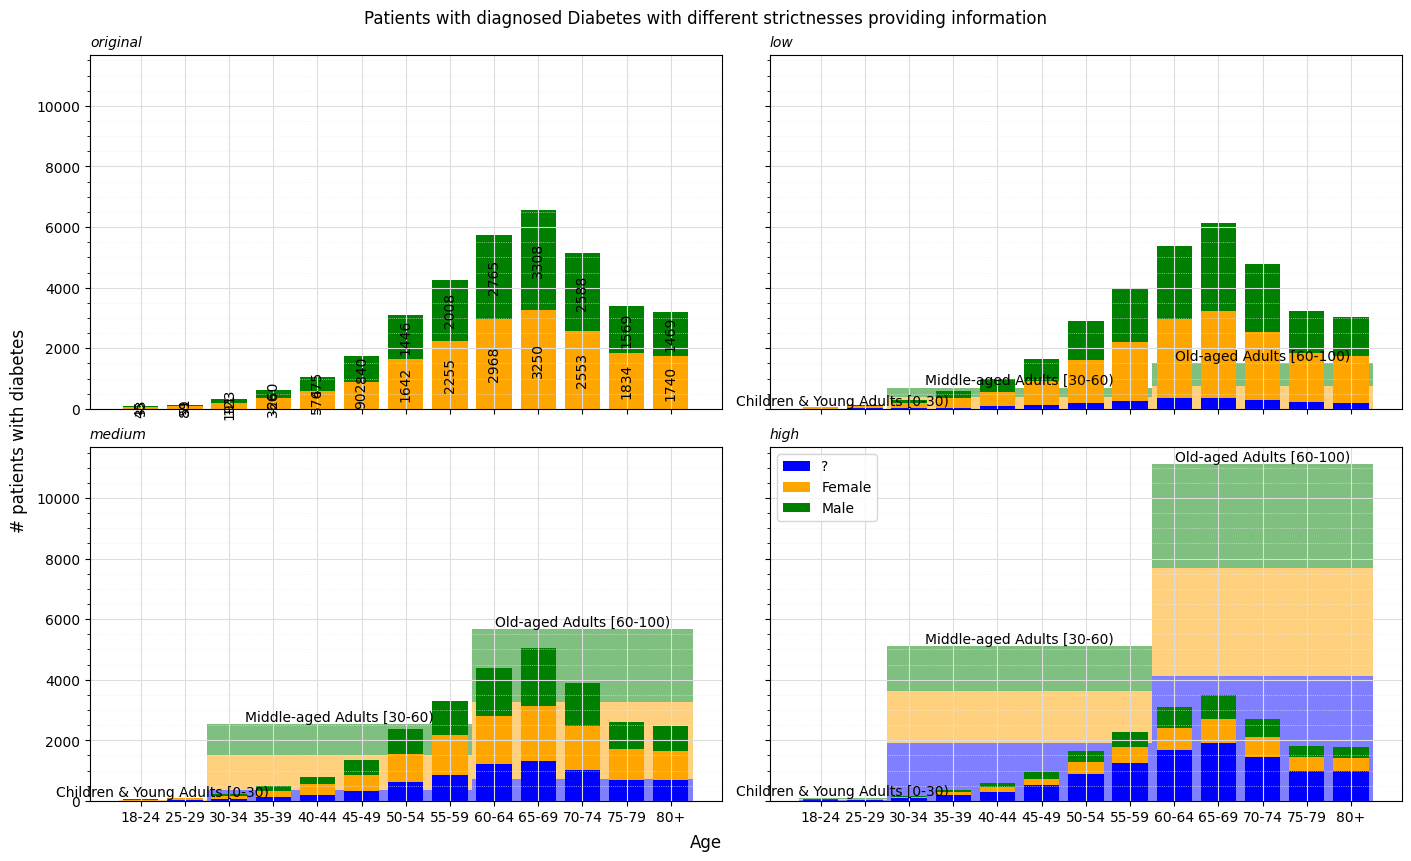

In [5]:
fig = plt.figure(figsize=(14, 8.5), layout='constrained')
ax_array = fig.subplots(2, 2, squeeze=False, sharey=True, sharex=True)

def mulitplot_stacked(ax, level):
    # Load the data
    if level == 'original':
        data = pd.read_csv('../diabetes_012/diabetes_012_cleaned.csv')
    else:
        data = pd.read_csv('../diabetes_012/simulations/'+level+'.csv')
    labels = ['Children & Young Adults [0-30)', 'Middle-aged Adults [30-60)', 'Old-aged Adults [60-100)']

    data_diabetes = data[data['Diabetes_012'] == 2.0]

    # all ages
    age_distr = data_diabetes.groupby(['Age','Sex'])['Diabetes_012'].count()
    # age groups
    if level != 'original':
        age_group_count = age_distr.loc[['[0-30)', '[30-60)', '[60-100)']]
        age_group_count_fixed = age_group_count.reorder_levels(['Sex', 'Age']).sort_index().reset_index()
        sex_female = age_group_count_fixed.loc[age_group_count_fixed['Sex'] == 'female']
        sex_male = age_group_count_fixed.loc[age_group_count_fixed['Sex'] == 'male']
        sex_unknown = age_group_count_fixed.loc[age_group_count_fixed['Sex'] == '?']
        groups = [0.5, 4.5, 10]
        widths = [2, 6, 5]
        if level == 'low':
            ax.bar(groups, sex_female['Diabetes_012'], width=widths, align='center',color='orange',  alpha=0.5)
            ax.bar(groups, sex_male['Diabetes_012'],width=widths,align='center', color='green',  alpha=0.5, bottom=sex_female['Diabetes_012'])
        else:
            y = age_group_count_fixed.loc[age_group_count_fixed['Sex'] != 'male'].groupby('Age').sum().reset_index()
            ax.bar(groups, sex_unknown['Diabetes_012'], width=widths, align='center', color='blue', alpha=0.5)
            ax.bar(groups, sex_female['Diabetes_012'], width=widths, align='center',color='orange',  alpha=0.5, bottom=sex_unknown['Diabetes_012'])
            ax.bar(groups, sex_male['Diabetes_012'],width=widths,align='center', color='green',  alpha=0.5, bottom=y['Diabetes_012'])
      
        # dataset ages
        age_count = age_distr.drop(labels=['[0-30)', '[30-60)', '[60-100)'])
    else:
        age_count = age_distr
    age_count_fixed = age_count.reorder_levels(['Sex', 'Age']).sort_index().reset_index()
    sex_unknown2 = age_count_fixed.loc[age_count_fixed['Sex'] == '?']
    sex_female2 = age_count_fixed.loc[age_count_fixed['Sex'] == 'female']
    sex_male2 = age_count_fixed.loc[age_count_fixed['Sex'] == 'male']

    if level == 'original':
        ax.bar(sex_female2['Age'], sex_female2['Diabetes_012'], color='orange', label='Female')
        ax.bar(sex_male2['Age'], sex_male2['Diabetes_012'], color='green', label='Male', bottom=sex_female2['Diabetes_012'])
    else:
        y2 = age_count_fixed.loc[age_count_fixed['Sex'] != 'male'].groupby('Age').sum().reset_index()
        ax.bar(sex_unknown2['Age'], sex_unknown2['Diabetes_012'], color='blue', label='?')
        ax.bar(sex_female2['Age'], sex_female2['Diabetes_012'], color='orange', label='Female', bottom=sex_unknown2['Diabetes_012'])
        ax.bar(sex_male2['Age'], sex_male2['Diabetes_012'], color='green', label='Male', bottom=y2['Diabetes_012'])

    ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
    ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
    ax.set_title(level, loc='left', fontstyle='oblique', fontsize='medium')
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.set_xlabel('')

    if level == 'low':
        ax.bar_label(ax.containers[1], label_type='edge',labels=labels)
    elif level == 'original':
        ax.bar_label(ax.containers[0], label_type='center', rotation=90)
        ax.bar_label(ax.containers[1], label_type='center', rotation=90)
    else:
        ax.bar_label(ax.containers[2], label_type='edge',labels=labels)

mulitplot_stacked(ax_array[0, 0], 'original')
mulitplot_stacked(ax_array[0, 1], 'low')
mulitplot_stacked(ax_array[1, 0], 'medium')
mulitplot_stacked(ax_array[1, 1], 'high')
fig.suptitle('Patients with diagnosed Diabetes with different strictnesses providing information', fontsize='large')
fig.supxlabel('Age')
fig.supylabel('# patients with diabetes')
plt.legend()
plt.show()